### Loading the features that were created in preprocessing.py

In [12]:
import pandas as pd

# Skip lines with too many/few fields
test_df = pd.read_csv('INSHEP_features.csv')

In [13]:
# set max columns
pd.set_option('display.max_columns', None)

In [14]:
test_df

,file_id,activity,path,mean_entropy,mean_power,variance,stddev,max_vel,amp_density,kurtosis,zernike_moment,periodicity,mean_torso_power,pos_neg_ratio,doppler_offset,main_lobe_width,motion_duration,doppler_peak_velocity,doppler_symmetry_index,cepstral_entropy,range_bin_span,doppler_bandwidth
0,1P36A01R02,walking,C:\Users\Adnane\Desktop\Radar\ObjectClassifica...,9.025276,1.959870e+07,6.906348e+16,2.627993e+08,1.099138,0.000520,721.726235,0.113271,0.994416,7.179115e+07,1.530323,0.279423,0.258621,1.07,1.002155,0.209587,0.940833,6.0,0.836027
1,1P38A01R03,walking,C:\Users\Adnane\Desktop\Radar\ObjectClassifica...,9.258551,2.104924e+07,5.631026e+16,2.372978e+08,0.840517,0.000819,433.210982,0.090082,0.996295,6.311644e+07,1.251952,0.112505,0.161638,2.30,0.937500,0.111882,0.999645,6.0,0.915421
2,1P38A01R01,walking,C:\Users\Adnane\Desktop\Radar\ObjectClassifica...,9.140249,2.620588e+07,9.122603e+16,3.020365e+08,0.808190,0.000743,421.248890,0.122659,0.994956,1.433929e+08,1.574890,0.182513,0.193966,2.00,0.840517,0.223268,1.032866,5.0,0.705764
3,1P37A01R02,walking,C:\Users\Adnane\Desktop\Radar\ObjectClassifica...,9.187234,2.411605e+07,7.596749e+16,2.756220e+08,0.840517,0.000945,389.177448,0.133881,0.997439,1.239555e+08,0.917316,-0.039091,1.907328,2.01,0.840517,-0.043125,0.982990,6.0,0.738319
4,1P36A01R03,walking,C:\Users\Adnane\Desktop\Radar\ObjectClassifica...,8.914113,1.945387e+07,7.617443e+16,2.759972e+08,0.969828,0.000692,700.990139,0.163762,0.998437,6.483077e+07,2.064459,0.364250,0.193966,1.37,0.905172,0.347356,0.921222,6.0,0.762972
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1749,5P55A05R2,drink_water,C:\Users\Adnane\Desktop\Radar\ObjectClassifica...,7.935626,5.718070e+05,7.192478e+13,8.480848e+06,0.161638,0.000559,640.340498,0.185445,0.996149,2.337248e+07,0.927633,-0.015329,0.420259,0.42,0.161638,-0.037542,0.653246,3.0,0.272728
1750,5P55A05R3,drink_water,C:\Users\Adnane\Desktop\Radar\ObjectClassifica...,8.041883,9.940976e+05,1.895267e+14,1.376687e+07,-0.193966,0.000572,528.732149,0.168632,0.996483,3.984330e+07,1.403761,0.040513,0.387931,0.59,0.129310,0.167971,0.877308,2.0,0.242563
1751,5P56A05R1,drink_water,C:\Users\Adnane\Desktop\Radar\ObjectClassifica...,7.231323,2.052530e+06,1.951923e+15,4.418057e+07,0.161638,0.000533,1119.092028,0.156458,0.997134,8.719889e+07,1.275885,0.032924,0.420259,0.46,0.161638,0.121221,1.052820,2.0,0.204817
1752,5P56A05R2,drink_water,C:\Users\Adnane\Desktop\Radar\ObjectClassifica...,7.295752,1.713943e+06,1.355906e+15,3.682262e+07,0.193966,0.000288,1515.745649,0.166024,0.995440,6.577793e+07,1.193892,0.027241,0.484914,0.26,0.193966,0.088378,1.140604,2.0,0.228499


In [15]:
#display where path column is duplicate in order
test_df[test_df.duplicated(subset=['path'], keep=False)].sort_values(by='path')

,file_id,activity,path,mean_entropy,mean_power,variance,stddev,max_vel,amp_density,kurtosis,zernike_moment,periodicity,mean_torso_power,pos_neg_ratio,doppler_offset,main_lobe_width,motion_duration,doppler_peak_velocity,doppler_symmetry_index,cepstral_entropy,range_bin_span,doppler_bandwidth


In [16]:
#show how many are NaNs
print("Number of NaNs in each column:")
print(test_df.isna().sum())

Number of NaNs in each column:
file_id                   0
activity                  0
path                      0
mean_entropy              0
mean_power                0
variance                  0
stddev                    0
max_vel                   0
amp_density               0
kurtosis                  0
zernike_moment            0
periodicity               0
mean_torso_power          0
pos_neg_ratio             0
doppler_offset            0
main_lobe_width           0
motion_duration           0
doppler_peak_velocity     0
doppler_symmetry_index    0
cepstral_entropy          0
range_bin_span            0
doppler_bandwidth         0
dtype: int64


### Mapping the labels to numbers

In [17]:
# Drop unwanted columns
test_df = test_df.drop(columns=['file_id', 'path'])

# Define the mapping
ACTIVITY_MAP = {
    "walking": 1,
    "sitting_down": 2,
    "standing_up": 3,
    "pick_object": 4,
    "drink_water": 5,
    "fall": 6,
}

# Map string labels to numeric codes
test_df['activity'] = test_df['activity'].map(ACTIVITY_MAP)

# Display the first few rows
test_df.head()


,activity,mean_entropy,mean_power,variance,stddev,max_vel,amp_density,kurtosis,zernike_moment,periodicity,mean_torso_power,pos_neg_ratio,doppler_offset,main_lobe_width,motion_duration,doppler_peak_velocity,doppler_symmetry_index,cepstral_entropy,range_bin_span,doppler_bandwidth
0,1,9.025276,1.959870e+07,6.906348e+16,2.627993e+08,1.099138,0.000520,721.726235,0.113271,0.994416,7.179115e+07,1.530323,0.279423,0.258621,1.07,1.002155,0.209587,0.940833,6.0,0.836027
1,1,9.258551,2.104924e+07,5.631026e+16,2.372978e+08,0.840517,0.000819,433.210982,0.090082,0.996295,6.311644e+07,1.251952,0.112505,0.161638,2.30,0.937500,0.111882,0.999645,6.0,0.915421
2,1,9.140249,2.620588e+07,9.122603e+16,3.020365e+08,0.808190,0.000743,421.248890,0.122659,0.994956,1.433929e+08,1.574890,0.182513,0.193966,2.00,0.840517,0.223268,1.032866,5.0,0.705764
3,1,9.187234,2.411605e+07,7.596749e+16,2.756220e+08,0.840517,0.000945,389.177448,0.133881,0.997439,1.239555e+08,0.917316,-0.039091,1.907328,2.01,0.840517,-0.043125,0.982990,6.0,0.738319
4,1,8.914113,1.945387e+07,7.617443e+16,2.759972e+08,0.969828,0.000692,700.990139,0.163762,0.998437,6.483077e+07,2.064459,0.364250,0.193966,1.37,0.905172,0.347356,0.921222,6.0,0.762972


In [18]:
#display all where activity is NaN
test_df[test_df['activity'].isna()]

,activity,mean_entropy,mean_power,variance,stddev,max_vel,amp_density,kurtosis,zernike_moment,periodicity,mean_torso_power,pos_neg_ratio,doppler_offset,main_lobe_width,motion_duration,doppler_peak_velocity,doppler_symmetry_index,cepstral_entropy,range_bin_span,doppler_bandwidth


### Splitting in train, test and validation set

In [19]:
#train test split with equal distribution of activity classes
from sklearn.model_selection import train_test_split
X = test_df.drop(columns=['activity'])
y = test_df['activity']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

#split in validation and train
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, stratify=y_train, random_state=42)


# Display the shapes of the train and test sets
print(f"Train set shape: {X_train.shape}, Test set shape: {X_test.shape}")
# Save the train and test sets to csv files
X_train.to_csv('X_train.csv', index=False)
X_test.to_csv('X_test.csv', index=False)
X_val.to_csv('X_val.csv', index=False)
y_val.to_csv('y_val.csv', index=False)
y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)

Train set shape: (1122, 19), Test set shape: (351, 19)


In [20]:
#leave one out feature search
from sklearn.feature_selection import RFECV
from sklearn.ensemble import RandomForestClassifier
# Initialize the Random Forest Classifier
rf = RandomForestClassifier(n_estimators=100, random_state=42)
selector = RFECV(estimator=rf, step=1, cv=5, scoring='accuracy', verbose = 4)
selector = selector.fit(X_train, y_train)
# Get the selected features
selected_features = X_train.columns[selector.support_]
print("Selected features:", selected_features.tolist())

Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.
Fitting estimator with 5 features.
Fitting estimator with 4 features.
Fitting estimator with 3 features.
Fitting estimator with 2 features.
Fitting estimator with 19 features.
Fitting estimator with 18 features.
Fitting estimator with 17 features.
Fitting estimator with 16 features.
Fitting estimator with 15 features.
Fitting estimator with 14 features.
Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.


In [21]:
#only keep selected features
X_train = X_train[selected_features]
X_test = X_test[selected_features]
X_val = X_val[selected_features]


# Training

### Classifying using RF classifier

In [22]:
#train a random forest classifier
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)
# Evaluate the model on the test set
from sklearn.metrics import accuracy_score, classification_report
y_pred = rf_clf.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Test set accuracy: {accuracy:.2f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=ACTIVITY_MAP.keys()))

Test set accuracy: 0.87
Classification Report:
              precision    recall  f1-score   support

     walking       0.97      0.97      0.97        62
sitting_down       0.94      0.94      0.94        63
 standing_up       0.89      0.92      0.90        62
 pick_object       0.72      0.82      0.77        62
 drink_water       0.78      0.68      0.72        62
        fall       1.00      0.93      0.96        40

    accuracy                           0.87       351
   macro avg       0.88      0.87      0.88       351
weighted avg       0.87      0.87      0.87       351



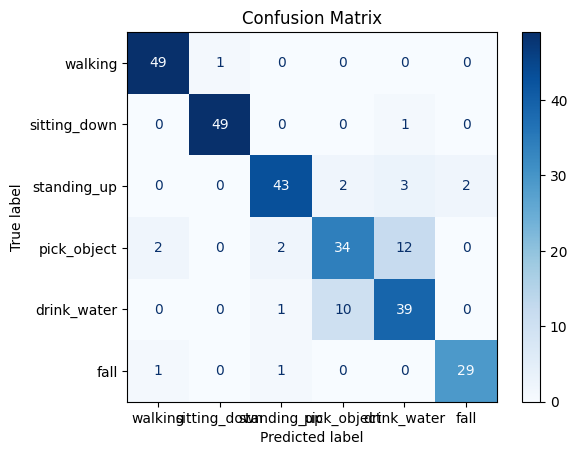

In [79]:
#plot confusion matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay
cm = ConfusionMatrixDisplay.from_estimator(rf_clf, X_val, y_val, display_labels=ACTIVITY_MAP.keys(), cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.show()

### Plotting the feature importance

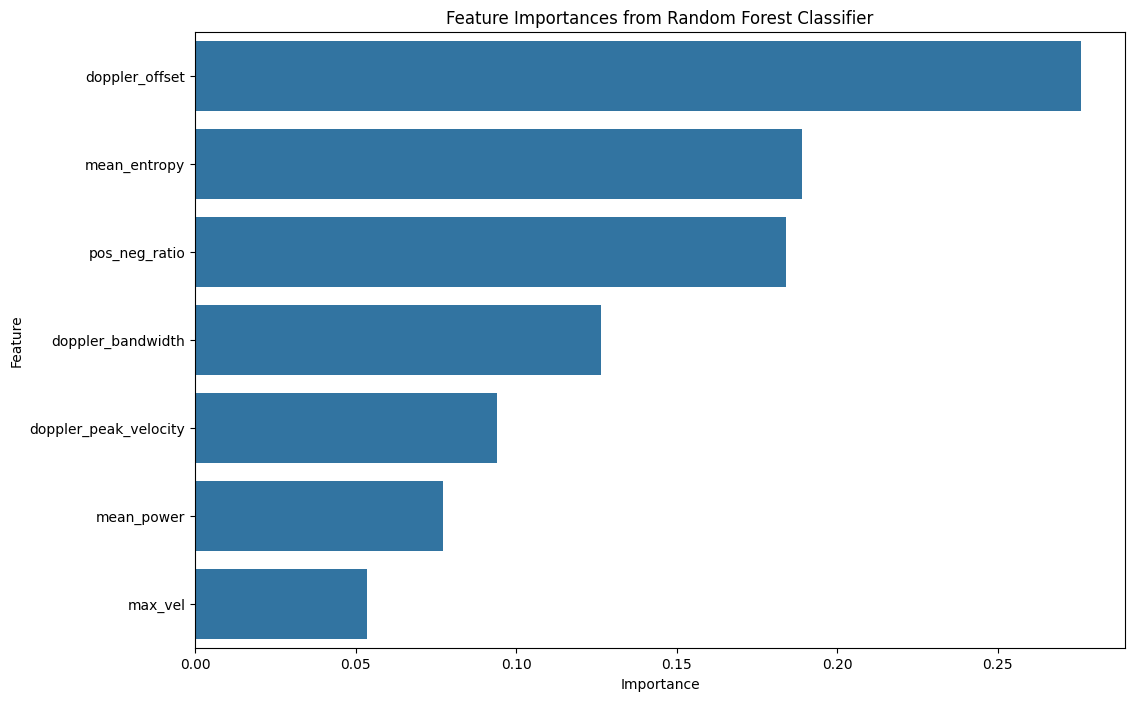

In [80]:
#plot feature importances

import matplotlib.pyplot as plt
import seaborn as sns
# Get feature importances
importances = rf_clf.feature_importances_

# Create a DataFrame for feature importances
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(12, 8))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances from Random Forest Classifier')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
#

In [81]:
X_train

,doppler_offset,mean_entropy,pos_neg_ratio,doppler_bandwidth,doppler_peak_velocity,max_vel,mean_power
1385,0.114200,8.518558,1.704131,0.337551,0.193966,0.258621,1.466551e+06
1010,-0.065971,8.118995,0.586519,0.316800,-0.161638,-0.193966,2.084753e+06
1386,0.127807,8.123006,1.619717,0.365849,0.226293,0.258621,1.031724e+06
557,-0.390159,7.881628,0.038383,0.442036,-0.161638,-0.161638,2.892606e+05
653,0.142071,7.656485,2.069802,0.300981,0.193966,0.193966,2.525739e+06
...,...,...,...,...,...,...,...
1505,0.294531,8.629406,7.306298,0.267605,0.355603,0.355603,7.061021e+06
1166,0.035414,9.131611,1.070572,0.750738,-0.678879,0.808190,1.461185e+06
1188,-0.015144,9.205058,0.923354,0.749433,0.743534,-0.872845,1.108899e+06
1224,0.057290,8.753071,1.237900,0.463488,0.484914,-0.420259,1.885032e+06


### Using LGBM classifier

In [82]:
#use lightgbm
import lightgbm as lgb
lgb_clf = lgb.LGBMClassifier(n_estimators=100, random_state=42)
lgb_clf.fit(X_train, y_train)
# Evaluate the model on the test set
y_pred_lgb = lgb_clf.predict(X_test)
accuracy_lgb = accuracy_score(y_test, y_pred_lgb)
print(f"LightGBM Test set accuracy: {accuracy_lgb:.2f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000129 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1402
[LightGBM] [Info] Number of data points in the train set: 1122, number of used features: 7
[LightGBM] [Info] Start training from score -1.724551
[LightGBM] [Info] Start training from score -1.729563
[LightGBM] [Info] Start training from score -1.729563
[LightGBM] [Info] Start training from score -1.729563
[LightGBM] [Info] Start training from score -1.734601
[LightGBM] [Info] Start training from score -2.178681
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Wa

### Standardizing the data for MLP

In [83]:
#standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_val_scaled = scaler.transform(X_val)

# Train the Random Forest Classifier on scaled data
rf_clf_scaled = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf_scaled.fit(X_train_scaled, y_train)

# Evaluate the model on the scaled test set
y_pred_scaled = rf_clf_scaled.predict(X_test_scaled)
accuracy_scaled = accuracy_score(y_test, y_pred_scaled)
print(f"Scaled Test set accuracy: {accuracy_scaled:.2f}")

Scaled Test set accuracy: 0.88


### Doing PCA to reduce the number of features

In [87]:
#perform PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=7)  
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)
# Train the Random Forest Classifier on PCA transformed data
X_val_pca = pca.transform(X_val_scaled)


In [88]:
#multi-layer perceptron
from sklearn.neural_network import MLPClassifier
# Create a Multi-layer Perceptron Classifier and evaluate on validation set
mlp_classifier = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42, verbose = True)
mlp_classifier.fit(X_train_pca, y_train)
# Evaluate the model on the validation set
# mlp_val_score = mlp_classifier.score(X_val, y_val)
# print(f'MLP Validation Score: {mlp_val_score:.4f}')

#test score
mlp_test_score = mlp_classifier.score(X_test_pca, y_test)
print(f'MLP Test Score: {mlp_test_score:.4f}')

Iteration 1, loss = 1.78132952
Iteration 2, loss = 1.61609832
Iteration 3, loss = 1.48393807
Iteration 4, loss = 1.36843437
Iteration 5, loss = 1.26290119
Iteration 6, loss = 1.16571776
Iteration 7, loss = 1.07548453
Iteration 8, loss = 0.99340988
Iteration 9, loss = 0.91661551
Iteration 10, loss = 0.84534619
Iteration 11, loss = 0.78141078
Iteration 12, loss = 0.72420585
Iteration 13, loss = 0.67362293
Iteration 14, loss = 0.63030620
Iteration 15, loss = 0.59059536
Iteration 16, loss = 0.55860408
Iteration 17, loss = 0.53121896
Iteration 18, loss = 0.50597172
Iteration 19, loss = 0.48544954
Iteration 20, loss = 0.46826017
Iteration 21, loss = 0.45369219
Iteration 22, loss = 0.44011354
Iteration 23, loss = 0.42845064
Iteration 24, loss = 0.41747435
Iteration 25, loss = 0.40858771
Iteration 26, loss = 0.39997185
Iteration 27, loss = 0.39236313
Iteration 28, loss = 0.38561363
Iteration 29, loss = 0.37895312
Iteration 30, loss = 0.37257827
Iteration 31, loss = 0.36709273
Iteration 32, los

c:\Users\Adnane\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


### Evaluation of MLP

In [89]:
from sklearn.metrics import accuracy_score

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print the accuracy
print("Accuracy:", accuracy)

Accuracy: 0.8774928774928775


### Custom Neural network Using Torch

In [90]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset
import numpy as np
import pandas as pd # Assuming X_train_pca is a pandas DataFrame
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split



# Encode labels to start from 0 using LabelEncoder
le = LabelEncoder()
# Fit on all unique labels across all sets to ensure consistency
le.fit(np.unique(np.concatenate([y_train, y_val, y_test])))

# Transform all label sets
y_train_tensor = torch.tensor(le.transform(y_train), dtype=torch.long)
y_val_tensor = torch.tensor(le.transform(y_val), dtype=torch.long)
y_test_tensor = torch.tensor(le.transform(y_test), dtype=torch.long)

# Define number of classes
num_classes = len(le.classes_)

# Debug: Check label ranges
print("Unique values in y_train_tensor:", torch.unique(y_train_tensor))
print("Unique values in y_val_tensor:", torch.unique(y_val_tensor))
print("Unique values in y_test_tensor:", torch.unique(y_test_tensor))
print("num_classes:", num_classes)

# Assertions for label range (already present, good practice)
assert torch.all(y_train_tensor >= 0) and torch.all(y_train_tensor < num_classes), \
    f"y_train_tensor has out-of-range labels. Min: {y_train_tensor.min()}, Max: {y_train_tensor.max()}, Expected range [0, {num_classes-1}]"
assert torch.all(y_val_tensor >= 0) and torch.all(y_val_tensor < num_classes), \
    f"y_val_tensor has out-of-range labels. Min: {y_val_tensor.min()}, Max: {y_val_tensor.max()}, Expected range [0, {num_classes-1}]"
assert torch.all(y_test_tensor >= 0) and torch.all(y_test_tensor < num_classes), \
    f"y_test_tensor has out-of-range labels. Min: {y_test_tensor.min()}, Max: {y_test_tensor.max()}, Expected range [0, {num_classes-1}]"


# Convert PCA features to PyTorch tensors
# Use directly since X_train_pca, X_val_pca, X_test_pca are numpy arrays
X_train_tensor = torch.tensor(X_train_pca, dtype=torch.float32)
X_val_tensor = torch.tensor(X_val_pca, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test_pca, dtype=torch.float32)

# Check for NaNs/Infs in input tensors
print("X_train_tensor has NaNs:", torch.isnan(X_train_tensor).any())
print("X_train_tensor has Infs:", torch.isinf(X_train_tensor).any())
print("X_val_tensor has NaNs:", torch.isnan(X_val_tensor).any())
print("X_val_tensor has Infs:", torch.isinf(X_val_tensor).any())
print("X_test_tensor has NaNs:", torch.isnan(X_test_tensor).any())
print("X_test_tensor has Infs:", torch.isinf(X_test_tensor).any())


# Create DataLoader for training and validation sets
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)
train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# Define the neural network architecture
class SimpleNN(nn.Module):
    def __init__(self, input_size, num_classes):
        super(SimpleNN, self).__init__()
        self.fc1 = nn.Linear(input_size, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, num_classes)
        self.relu = nn.ReLU()
        self.dropout = nn.Dropout(0.7)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x) # No activation here, as CrossEntropyLoss expects logits
        return x

# Initialize model, loss function, and optimizer
input_size = X_train_pca.shape[1]
model = SimpleNN(input_size, num_classes)

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Using device: {device}")
model.to(device)

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.005)

# Training loop with early stopping
num_epochs = 5000
patience = 200
best_val_loss = float('inf')
early_stopping_counter = 0
best_model_path = 'best_model.pth' # Define path for saving best model

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * inputs.size(0)

    epoch_loss = running_loss / len(train_loader.dataset)

    # Validation step
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item() * inputs.size(0)

    val_loss /= len(val_loader.dataset)

    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {epoch_loss:.4f}, Val Loss: {val_loss:.4f}')

    # Early stopping logic
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        early_stopping_counter = 0
        torch.save(model.state_dict(), best_model_path)  # Save best model
    else:
        early_stopping_counter += 1

    if early_stopping_counter >= patience:
        print("Early stopping triggered")
        break

# Load best model for evaluation
print(f"Loading best model from {best_model_path}")
model.load_state_dict(torch.load(best_model_path))

# Evaluate on the test set
model.eval()
test_loss = 0.0
test_correct = 0
with torch.no_grad():
    test_loader = DataLoader(TensorDataset(X_test_tensor, y_test_tensor), batch_size=32)
    for inputs, labels in test_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        test_loss += loss.item() * inputs.size(0)
        _, predicted = torch.max(outputs, 1)
        test_correct += (predicted == labels).sum().item()

test_loss /= len(X_test_tensor)
test_accuracy = test_correct / len(X_test_tensor)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.4f}')

# Save final model (optional, often you'd just use the best_model.pth for deployment)
final_model_path = 'final_model.pth'
torch.save(model.state_dict(), final_model_path)
print(f"Final model state saved to {final_model_path}")

# Load model for inference (example)
# loaded_model = SimpleNN(input_size, num_classes)
# loaded_model.load_state_dict(torch.load('final_model.pth'))
# loaded_model.to(device) # Don't forget to move it to device if you want to use it on GPU
# loaded_model.eval()

Unique values in y_train_tensor: tensor([0, 1, 2, 3, 4, 5])
Unique values in y_val_tensor: tensor([0, 1, 2, 3, 4, 5])
Unique values in y_test_tensor: tensor([0, 1, 2, 3, 4, 5])
num_classes: 6
X_train_tensor has NaNs: tensor(False)
X_train_tensor has Infs: tensor(False)
X_val_tensor has NaNs: tensor(False)
X_val_tensor has Infs: tensor(False)
X_test_tensor has NaNs: tensor(False)
X_test_tensor has Infs: tensor(False)
Using device: cuda
Epoch [1/5000], Loss: 1.1561, Val Loss: 0.7337
Epoch [2/5000], Loss: 0.7787, Val Loss: 0.5881
Epoch [3/5000], Loss: 0.7103, Val Loss: 0.5097
Epoch [4/5000], Loss: 0.6680, Val Loss: 0.5182
Epoch [5/5000], Loss: 0.6308, Val Loss: 0.5330
Epoch [6/5000], Loss: 0.5590, Val Loss: 0.5126
Epoch [7/5000], Loss: 0.5711, Val Loss: 0.4815
Epoch [8/5000], Loss: 0.5798, Val Loss: 0.4918
Epoch [9/5000], Loss: 0.6028, Val Loss: 0.5270
Epoch [10/5000], Loss: 0.5890, Val Loss: 0.5038
Epoch [11/5000], Loss: 0.4881, Val Loss: 0.4590
Epoch [12/5000], Loss: 0.4998, Val Loss: 0

C:\Users\Adnane\AppData\Local\Temp\ipykernel_22072\4116019938.py:139: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load(best_model_path))
